# Problema da Mochila Binária

## Giovana Cassoni Andrade

## Exploration vs. Exploitation por Algoritmos Genéticos

![https://miro.medium.com/max/1156/1*G9WdXqxj016CaAX9zrFewQ.jpeg](https://miro.medium.com/max/1156/1*G9WdXqxj016CaAX9zrFewQ.jpeg)

In [1]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt

In [2]:
item_number = np.arange(1,41) #items que podem ir para a mochila
weight = np.random.randint(1, 15, size=40) # pesos aleatorios
value = np.random.randint(1, 100, size=40) # valores aleatorios
knapsack_capacity = 100 # peso máximo da mochila

In [3]:
print('Possíveis itens:')
print('Item\tPeso\tValor')
for i in range(len(item_number)):
  print(f"{item_number[i]}\t{weight[i]}\t{value[i]}")

Possíveis itens:
Item	Peso	Valor
1	3	55
2	11	31
3	9	80
4	13	14
5	14	44
6	4	48
7	12	1
8	3	37
9	10	78
10	11	28
11	8	84
12	1	53
13	9	16
14	8	61
15	14	48
16	5	9
17	14	68
18	10	49
19	2	32
20	8	4
21	13	47
22	14	9
23	2	65
24	13	92
25	9	98
26	7	71
27	5	48
28	10	98
29	14	59
30	8	66
31	9	6
32	2	90
33	5	45
34	13	87
35	10	53
36	1	72
37	10	63
38	4	85
39	2	81
40	8	12


In [4]:
print('Capacidade da mochila: ', knapsack_capacity)

Capacidade da mochila:  100


## População inicial

In [5]:
solutions_per_pop = 16
pop_size = (solutions_per_pop, len(item_number))
print(f'Tamanho da população = {pop_size}')
initial_population = np.random.randint(2, size = pop_size)
initial_population = initial_population.astype(int)
num_generations = 1000
print(f'População inicial:\n {initial_population}')

Tamanho da população = (16, 40)
População inicial:
 [[1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0
  0 1 0 1]
 [0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1
  0 0 0 0]
 [1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1
  1 0 0 1]
 [0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0
  1 1 0 0]
 [1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1
  1 1 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1
  1 1 1 0]
 [0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1
  1 1 0 0]
 [0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0
  0 0 0 0]
 [1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1
  0 1 1 0]
 [1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0
  0 1 0 1]
 [0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0
  0 1 1 1]
 [1 1 1 1 0 1

# Função de Fitness

![https://miro.medium.com/max/744/1*fenR6vIzGliZ6IfnR83stw.gif](https://miro.medium.com/max/744/1*fenR6vIzGliZ6IfnR83stw.gif)

![https://miro.medium.com/max/482/1*upStA6rK51fNybBWdifpqg.gif](https://miro.medium.com/max/482/1*upStA6rK51fNybBWdifpqg.gif)


Onde:

$n$ = tamanho de um cromossomo (solução de nosso problema)

$c_i$ = o i-ésimo gene

$v_i$ = o valor do i-ésimo gene

$W_i$ = o peso do i-ésimo gene

$kw$ = capacidade da mochila

In [6]:
def fitness(weight, value, population, capacity):
  fitness = np.empty(len(population))
  for i in range(len(fitness)):
    S1 = np.sum(population[i] * value)
    S2 = np.sum(population[i] * weight)
    if S2 <= capacity:
      fitness[i] = S1
    else:
      fitness[i] = 0
  return fitness.astype(int)

# Seleção para crossover (futura geração)

In [7]:
def selection(fitness, num_parents, population):
  fitness = list(fitness)
  parents = np.empty((num_parents, population.shape[1]))
  for i in range(num_parents):
    max_fitness_idx = np.where(fitness == np.max(fitness))
    parents[i,:] = population[max_fitness_idx[0][0], :]
    fitness[max_fitness_idx[0][0]] = -9999
  return parents

# Crossover

In [8]:
def crossover(parents, num_offsprings):
  offsprings = np.empty((num_offsprings, parents.shape[1]))
  crossover_point = int(parents.shape[1]/2)
  crossover_rate = 0.8
  i = 0
  cnt_offsprings = 0

  while (cnt_offsprings < num_offsprings):
    parent1_index = i%parents.shape[0] #index do genitor 1
    parent2_index = (i+1)%parents.shape[0] #indice do genitor 2
    x = rd.random()
    if x > crossover_rate:
      pass
    else:
      offsprings[cnt_offsprings,0:crossover_point] = parents[parent1_index,0:crossover_point]
      offsprings[cnt_offsprings,crossover_point:] = parents[parent2_index,crossover_point:]
      cnt_offsprings +=1
    i += 1
  return offsprings

# Mutação

In [9]:
def mutation(offsprings):
    mutants = np.empty((offsprings.shape))
    mutation_rate = 0.15
    for i in range(mutants.shape[0]):
        random_value = rd.random()
        mutants[i,:] = offsprings[i,:]
        if random_value > mutation_rate:
            continue
        int_random_value = randint(0,offsprings.shape[1]-1)
        if mutants[i,int_random_value] == 0 :
            mutants[i,int_random_value] = 1
        else :
            mutants[i,int_random_value] = 0
    return mutants

In [10]:
def optimize(weight, value, population, pop_size, num_generations, capacity):
    parameters, fitness_history = [], []
    num_parents = int(pop_size[0]/2)
    num_offsprings = pop_size[0] - num_parents
    for i in range(num_generations):
        fitness_ = fitness(weight, value, population, capacity)
        fitness_history.append(fitness_)
        parents = selection(fitness_, num_parents, population)
        offsprings = crossover(parents, num_offsprings)
        mutants = mutation(offsprings)
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutants

    print('Última geraçào: \n{}\n'.format(population))
    fitness_last_gen = fitness(weight, value, population, capacity)
    print('Fitness da última geração: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    parameters.append(population[max_fitness[0][0],:])
    return parameters, fitness_history

# Execução do Algoritmo Genético

In [11]:
parameters, fitness_history = optimize(weight, value, initial_population, pop_size, num_generations, knapsack_capacity)


Última geraçào: 
[[1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1
  1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1
  1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1
  1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1
  1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1
  1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1
  1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1
  1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1
  1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1
  1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1
  1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1
  1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 

In [12]:
print('Indivíduo da última geração com maior fitness: \n{}'.format(parameters))

selected_items = item_number * parameters


print('\nQuais itens irão na mochila:')
peso = 0
for i in range(selected_items.shape[1]):

  if selected_items[0][i] != 0:
     print('{}'.format(selected_items[0][i]), end='\t')
     peso = peso + weight[i]


print('\nPeso total da mochila = ', peso)

Indivíduo da última geração com maior fitness: 
[array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0])]

Quais itens irão na mochila:
1	7	12	16	18	24	27	30	33	34	35	36	37	38	
Peso total da mochila =  100


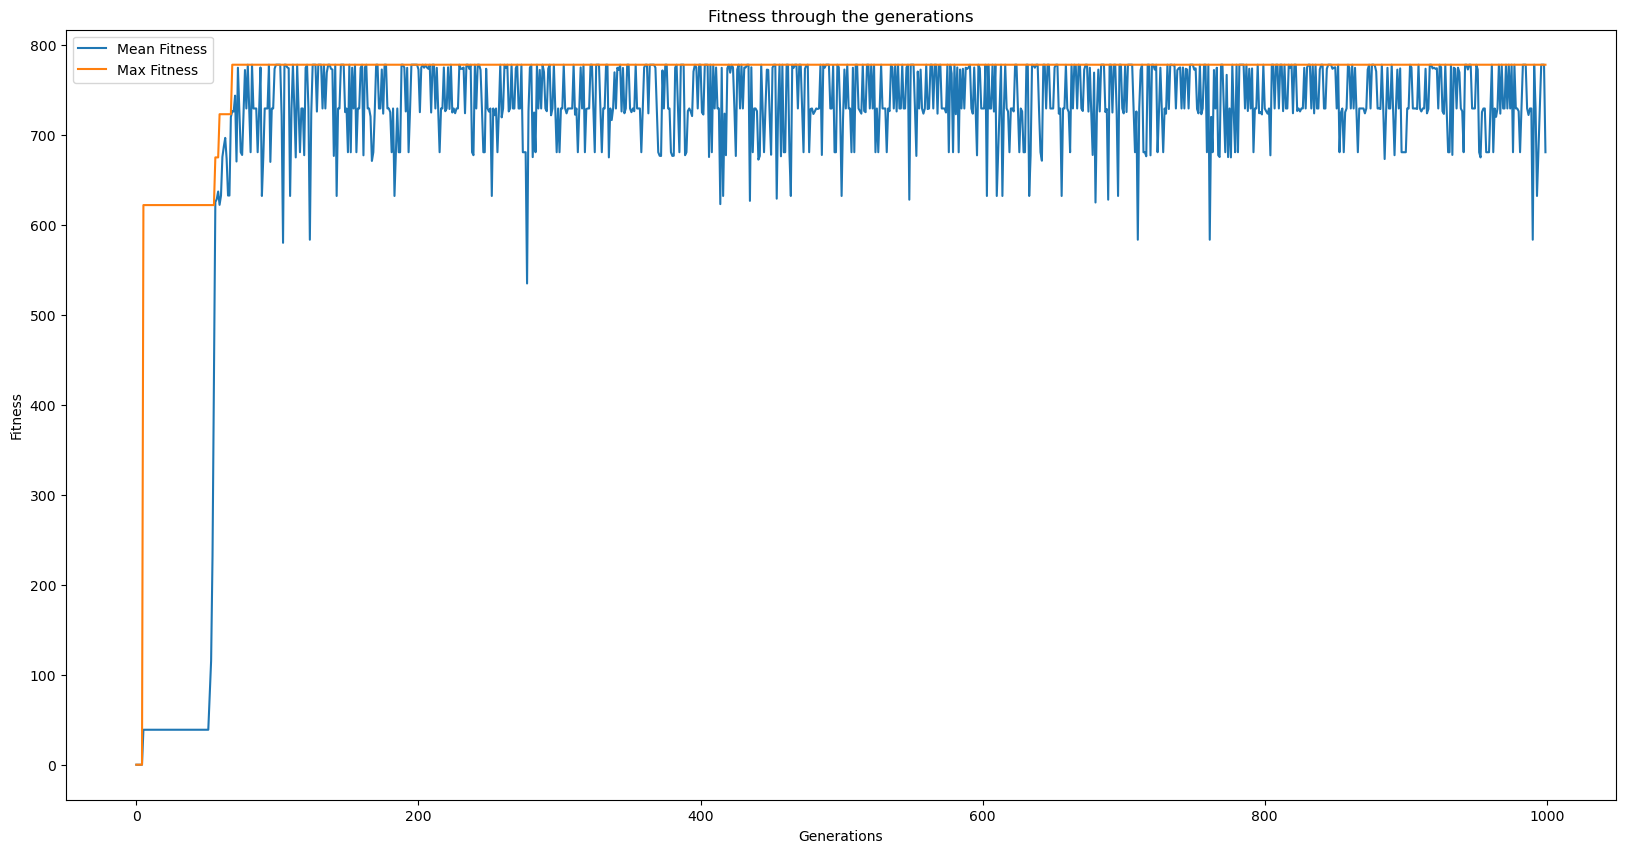

(1000, 16)


In [13]:
plt.figure(figsize=(20,10))
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(fitness_history).shape)

# Implementação em C++

In [ ]:
%%writefile genetic_algorithm.cpp
#include <iostream>
#include <vector>
#include <cstdlib>
#include <ctime>
#include <algorithm>
#include <numeric>
#include <iomanip>
#include <cmath>
#include <fstream>

using namespace std;

int randomInt(int min, int max) {
    return rand() % (max - min + 1) + min;
}

double randomDouble() {
    return static_cast<double>(rand()) / RAND_MAX;
}

// Função de fitness
vector<int> fitness(const vector<int>& weights, const vector<int>& values, const vector<vector<int>>& population, int capacity) {
    vector<int> fitness(population.size(), 0);
    for (size_t i = 0; i < population.size(); i++) {
        int total_value = 0, total_weight = 0;
        for (size_t j = 0; j < population[i].size(); j++) {
            total_value += population[i][j] * values[j];
            total_weight += population[i][j] * weights[j];
        }
        if (total_weight <= capacity) { fitness[i] = total_value; }
    }
    return fitness;
}

// Seleção
vector<vector<int>> selection(const vector<int>& fitness, int num_parents, const vector<vector<int>>& population) {
    vector<vector<int>> parents;
    vector<int> fitness_copy = fitness;
    for (int i = 0; i < num_parents; i++) {
        auto max_iter = max_element(fitness_copy.begin(), fitness_copy.end());
        int index = distance(fitness_copy.begin(), max_iter);
        parents.push_back(population[index]);
        *max_iter = -1;
    }
    return parents;
}

// Crossover
vector<vector<int>> crossover(const vector<vector<int>>& parents, int num_offsprings) {
    vector<vector<int>> offsprings(num_offsprings, vector<int>(parents[0].size(), 0));
    int crossover_point = parents[0].size() / 2;
    double crossover_rate = 0.8;
    int i = 0, cnt_offsprings = 0;
    while (cnt_offsprings < num_offsprings) {
        int parent1_index = i % parents.size();
        int parent2_index = (i + 1) % parents.size();
        if (randomDouble() <= crossover_rate) {
            for (int j = 0; j < crossover_point; j++) { offsprings[cnt_offsprings][j] = parents[parent1_index][j]; }
            for (size_t j = crossover_point; j < parents[0].size(); j++) { offsprings[cnt_offsprings][j] = parents[parent2_index][j]; }
            cnt_offsprings++;
        }
        i++;
    }
    return offsprings;
}

// Mutação
vector<vector<int>> mutation(const vector<vector<int>>& offsprings) {
    vector<vector<int>> mutants = offsprings;
    double mutation_rate = 0.15;
    for (size_t i = 0; i < mutants.size(); i++) {
        if (randomDouble() <= mutation_rate) {
            int gene = randomInt(0, mutants[i].size() - 1);
            mutants[i][gene] = 1 - mutants[i][gene];
        }
    }
    return mutants;
}

// Otimização
pair<vector<int>, vector<vector<int>>> optimize(const vector<int>& weights, const vector<int>& values, vector<vector<int>>& population, int num_generations, int capacity) {
    vector<int> best_individual;
    vector<vector<int>> fitness_history;
    int num_parents = population.size() / 2;
    int num_offsprings = population.size() - num_parents;
    for (int generation = 0; generation < num_generations; ++generation) {
        vector<int> current_fitness = fitness(weights, values, population, capacity);
        fitness_history.push_back(current_fitness);
        vector<vector<int>> parents = selection(current_fitness, num_parents, population);
        vector<vector<int>> offsprings = crossover(parents, num_offsprings);
        vector<vector<int>> mutants = mutation(offsprings);
        copy(parents.begin(), parents.end(), population.begin());
        copy(mutants.begin(), mutants.end(), population.begin() + num_parents);
    }
    cout << "Última geração:\n";
    for (const auto& individual : population) {
        for (int gene : individual) { cout << gene << " "; }
        cout << "\n";
    }
    vector<int> fitness_last_gen = fitness(weights, values, population, capacity);
    cout << "Fitness da última geração:\n";
    for (int fit : fitness_last_gen) { cout << fit << " "; }
    cout << "\n";
    auto max_it = max_element(fitness_last_gen.begin(), fitness_last_gen.end());
    int best_index = distance(fitness_last_gen.begin(), max_it);
    best_individual = population[best_index];
    return {best_individual, fitness_history};
}

// Função principal
int main() {
    srand(time(0));

    int num_items = 40;
    int knapsack_capacity = 100;
    vector<int> item_number(num_items), weight(num_items), value(num_items);
    iota(item_number.begin(), item_number.end(), 1);

    // Criando a lista dos itens
    for (int i = 0; i < num_items; i++) {
        weight[i] = randomInt(1, 15);
        value[i] = randomInt(1, 100);
    }

    // Mostrando a lista e a capacidade de peso máxima
    cout << "Possíveis itens:\nItem\tPeso\tValor\n";
    for (int i = 0; i < num_items; i++) { cout << item_number[i] << "\t" << weight[i] << "\t" << value[i] << endl; }
    cout << "Capacidade da mochila: " << knapsack_capacity << endl;

    // Mostrando tamanho da população e a população inicial 
    int solutions_per_pop = 16;
    cout << "Tamanho da população = (" << solutions_per_pop << ", " << num_items << ")" << endl;
    vector<vector<int>> population(solutions_per_pop, vector<int>(num_items, 0));
    for (auto& individual : population) {
        for (int& gene : individual) { gene = randomInt(0, 1); }
    }
    cout << "População inicial:\n";
    for (const auto& individual : population) {
        for (const int gene : individual) { cout << gene << " "; }
        cout << endl;
    }

    // Obtendo melhor combinação e o fitness
    int num_generations = 1000;
    auto [best_individual, fitness_history] = optimize(weight, value, population, num_generations, knapsack_capacity);

    // Mostrando a melhor combinação
    cout << "Indivíduo da última geração com maior fitness: ";
    for (int gene : best_individual) { cout << gene << " "; }
    cout << endl;

    // Mostrando os itens e somando pesos e valores
    cout << "Quais itens irão na mochila: ";
    int total_weight = 0, total_value = 0;
    for (size_t i = 0; i < best_individual.size(); i++) {
        if (best_individual[i] != 0) {
            cout << item_number[i] << " ";
            total_weight += weight[i];
            total_value += value[i];
        }
    }
    cout << "\nPeso total da mochila = " << total_weight << endl;
    cout << "Valor total da mochila = " << total_value << endl;

    // Graph
    vector<double> fitness_history_mean;
    vector<int> fitness_history_max;
    for (const auto& generation_fitness : fitness_history) {
        if (generation_fitness.empty()) { fitness_history_mean.push_back(0); }
        else { 
            double sum = accumulate(generation_fitness.begin(), generation_fitness.end(), 0.0);
            fitness_history_mean.push_back(sum / generation_fitness.size());
        }
        fitness_history_max.push_back(*max_element(generation_fitness.begin(), generation_fitness.end()));
    }

    // Write data to a file for plotting
    ofstream file("fitness_history.csv");
    if (file.is_open()) {
        file << "Generation,MeanFitness,MaxFitness\n";
        for (size_t i = 0; i < fitness_history_mean.size(); ++i) {
            file << i << "," << int(fitness_history_mean[i]) << "," << fitness_history_max[i] << "\n";
        }
        file.close();
        cout << "Data written to fitness_history.csv for plotting.\n";
    } else {
        cerr << "Error: Unable to open file for writing.\n";
    }


    return 0;
}

Writing genetic_algorithm.cpp


In [15]:
!g++ -std=c++17 genetic_algorithm.cpp -o genetic_algorithm

In [16]:
!./genetic_algorithm

Possíveis itens:
Item	Peso	Valor
1	10	84
2	3	6
3	10	56
4	4	14
5	3	49
6	13	23
7	5	54
8	7	84
9	3	82
10	1	45
11	14	85
12	7	63
13	3	96
14	13	22
15	4	29
16	8	55
17	6	70
18	15	51
19	4	54
20	10	9
21	1	39
22	6	29
23	3	24
24	7	81
25	7	89
26	3	81
27	2	69
28	14	40
29	6	77
30	14	26
31	13	52
32	12	77
33	4	79
34	15	67
35	3	75
36	9	49
37	9	16
38	9	51
39	1	80
40	8	8
Capacidade da mochila: 100
Tamanho da população = (16, 40)
População inicial:
1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 
0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 
1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 
0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 
1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 
0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 
0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 
0 